In [ ]:
#clustering

In [1]:
# import sys
# import cuentitas
# from entornomaximo import entornoMaximo as em
# from auxiliares import integracionGauss as ig
# from auxiliares import medicion
# from auxiliares import sigma
# from auxiliares import sigmaEmi
# from auxiliares import S0VV_completo
from auxiliares import generadorFran1Capa  #generador, generador1E, generadorEmisividad, 

# from numpy import pi, sqrt, sin, cos, exp, log10, array, real, conj
import numpy as np
# import matplotlib
from matplotlib import pyplot as plt
# from scipy import interpolate
import seaborn as sns
import pandas as pd
# import glob
# import theano.tensor as TT
# import random

# import time

# import pymc3 as pm

sns.set() #seaborn como default

In [2]:
fileName = 'DeltaTrazas.txt'

In [3]:
# dataDir = '/home/fran/proyectos/TesisJavi/1capa/set2-1Capa-noNoise-1s0+0emi-3000/'

# dataDir = '/home/fran/proyectos/TesisJavi/1capa/set1-1Capa-noNoise-3s0+1emi-10000/'

# dataDir = '/home/fran/proyectos/TesisJavi/2capas/set1-noNoise-3s0+emi-10000/'

dataDir = '/home/fran/proyectos/TesisJavi/2capas/set1-noNoise-3s0+1emi-50000-noNoise/'

# dataDir = '/home/fran/proyectos/TesisJavi/1capa/set2-1Capa-noNoise-1s0+1emi-20000/'

In [4]:
traza = np.genfromtxt(dataDir+fileName, delimiter=';')

In [5]:
traza.shape

(5, 200000)

In [6]:
plotear = np.stack((traza[0,:],traza[1,:],traza[2,:], traza[3,:], traza[4,:])).T
dfplotear = pd.DataFrame(plotear, columns = ['ep1','ep2','d','s1','s2'])

In [7]:
dfplotear

,ep1,ep2,d,s1,s2
0,1.416581,7.765506,0.233990,0.000102,0.001343
1,1.747956,3.549441,0.142234,0.000499,0.002845
2,1.416581,7.765506,0.233990,0.000102,0.001343
3,1.747956,3.549441,0.142234,0.000499,0.002845
4,1.416581,7.765506,0.233990,0.000102,0.001343
...,...,...,...,...,...
199995,1.693321,3.497931,0.134765,0.000661,0.002800
199996,4.750116,7.754795,0.457213,0.000212,0.002987
199997,1.629659,4.039434,0.281565,0.000793,0.002344
199998,1.263272,2.780934,0.169369,0.002178,0.002912


In [17]:
modelIn = np.genfromtxt(dataDir+'DeltaTrazas-input.txt', delimiter=' ')

ValueError: Some errors were detected !
    Line #2 (got 5 columns instead of 3)

In [16]:
modelIn

array([nan, nan])

In [8]:
# 1.93e+00 5.00e+00 3.00e-01 1.00e-03 2.00e-03

ep1_ = 1.93
ep2_ = 5.0
d_ = 0.3
s1_ = 0.001
s2_ = 0.002
 


# ep_ = 4
# s_ = 0.001
# l_ = 0.01 #set2



In [9]:
modelInReduced = [ep1_, ep2_, d_, s1_, s2_]

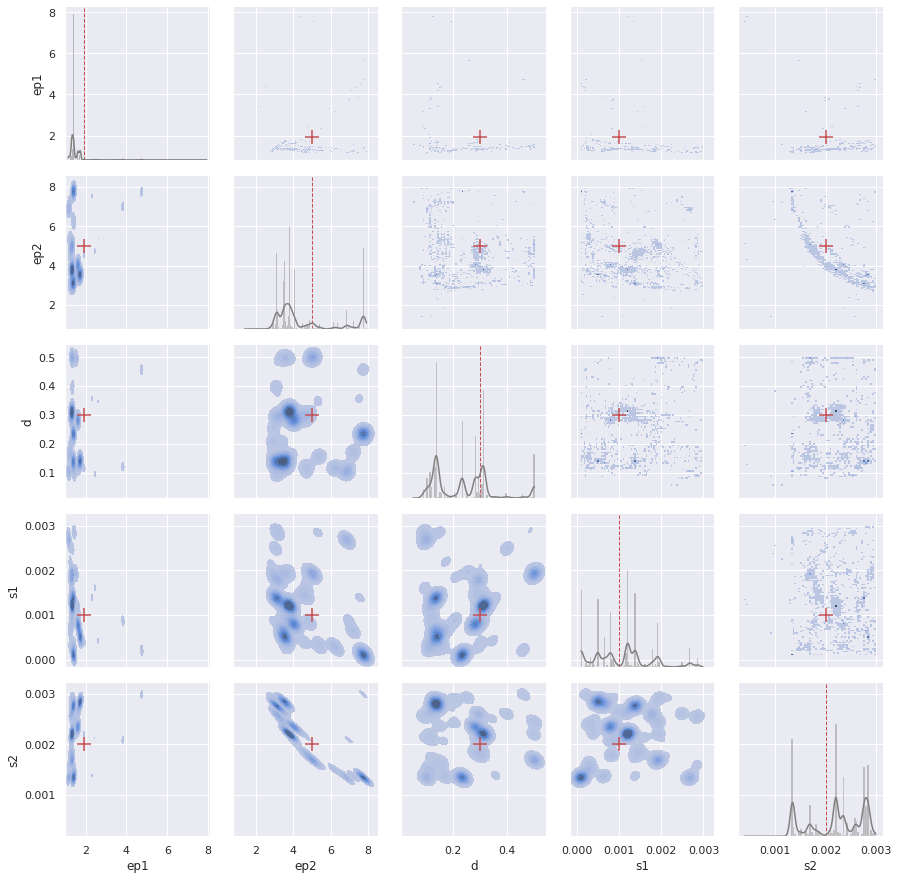

In [10]:
f = sns.PairGrid(dfplotear)
# f.fig.suptitle(Nombre, y=1.01, fontsize = 'large')
f.map_upper(sns.histplot)

f.map_lower(sns.kdeplot, fill=True)
f.map_diag(sns.histplot, kde=True, color='.5')

for i in range(5):
    for j in range(5):
        if i == j:
            #ploteo el valor verdadero en las marginales
            f.axes[j,i].axvline(modelInReduced[i], color='r', linestyle='dashed', linewidth=1)
        else:
            f.axes[j,i].scatter(modelInReduced[i], modelInReduced[j], marker="+", c='r', s=200) #color='k', linestyle='dashed', linewidth=1)
   

/home/fran/miniconda3/envs/bayes/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


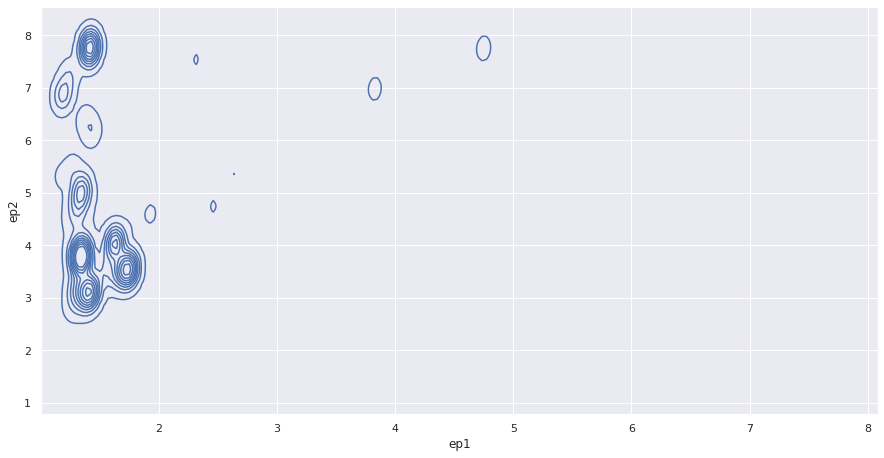

In [11]:
fig_ = plt.figure(figsize=(15, 7.5))
qq_ = sns.kdeplot(dfplotear.ep1, dfplotear.ep2)

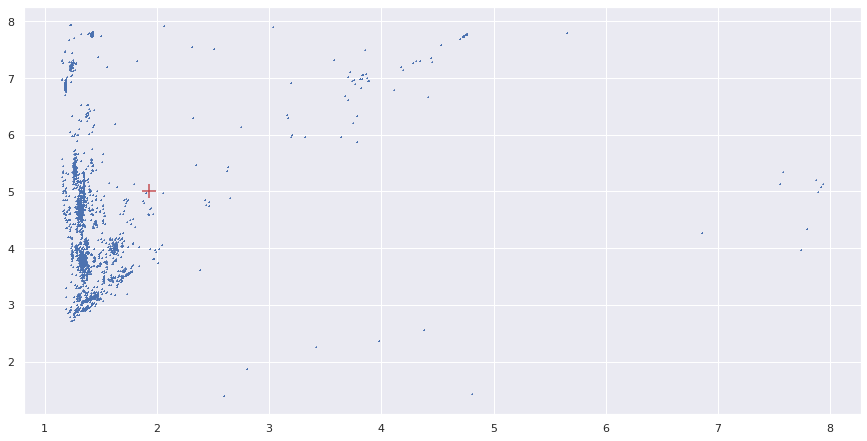

In [13]:
fig_ = plt.figure(figsize=(15, 7.5))
plt.scatter(dfplotear.ep1, dfplotear.ep2, marker="+", c='b', s=1)
plt.scatter(modelInReduced[0], modelInReduced[1], marker="+", c='r', s=200) 

In [ ]:
# help(density.get_xaxis())

In [ ]:
# from sklearn.neighbors import KernelDensity

In [ ]:
# from scipy import stats

In [ ]:
# # instantiate and fit the KDE model
# kde = KernelDensity(bandwidth=0.5, kernel='gaussian')
# kde.fit(X)

# # score_samples returns the log of the probability density
# logprob = kde.score_samples(X_resampled)

# plt.fill_between(X_resampled.flatten(), np.exp(logprob), alpha=0.8)
# # plt.plot(X, np.full_like(X, -0.01), '|k', markeredgewidth=1)
# # plt.ylim(-0.02, 0.22)

In [ ]:
# X = traza[:2,:].T

In [ ]:
# X.shape

In [ ]:
# data = X

In [ ]:
# data.shape

In [ ]:
# import numpy as np
# import matplotlib.pyplot as pl
import scipy.stats as st

# data = np.random.multivariate_normal((0, 0), [[0.8, 0.05], [0.05, 0.7]], 100)
x = dfplotear.ep1.values #data[:, 0]
y = dfplotear.ep2.values #data[:, 1]
xmin, xmax = 1, 8
ymin, ymax = 1, 8

# Peform the kernel density estimate
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])


kernel = st.gaussian_kde(values)
# kernel = kde.score_samples(values)

f = np.reshape(kernel(positions).T, xx.shape)

fig = plt.figure()
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# Contourf plot
cfset = ax.contourf(xx, yy, f, cmap='Blues')
## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
# Contour plot
cset = ax.contour(xx, yy, f, colors='k')
# Label plot
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('Y1')
ax.set_ylabel('Y0')

plt.show()

In [ ]:
plt.imshow(f.T)

In [ ]:
from matplotlib import cm

In [ ]:
# Make data.
# X = np.arange(-5, 5, 0.25)
# Y = np.arange(-5, 5, 0.25)
# X, Y = np.meshgrid(X, Y)
# R = np.sqrt(X**2 + Y**2)
# Z = np.sin(R)

# Plot the surface.
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.set_size_inches(18.5, 10.5, forward=True)
surf = ax.plot_surface(xx, yy, f, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [ ]:
import scipy.ndimage.filters as filters
import scipy.ndimage as ndimage

In [ ]:
data = f

In [ ]:
neighborhood_size = 5
threshold = 0.05

In [ ]:
data_max = filters.maximum_filter(data, neighborhood_size)
# data_max = filters.maximum_filter(data)
maxima = (data == data_max)
data_min = filters.minimum_filter(data, neighborhood_size)
diff = ((data_max - data_min) > threshold)
maxima[diff == 0] = 0

In [ ]:
labeled, num_objects = ndimage.label(maxima)
slices = ndimage.find_objects(labeled)
x, y = [], []
for dy,dx in slices:
    x_center = (dx.start + dx.stop - 1)/2
    x.append(x_center)
    y_center = (dy.start + dy.stop - 1)/2    
    y.append(y_center)

In [ ]:
plt.imshow(data)
plt.autoscale(False)
plt.plot(x,y, 'b+')

In [ ]:
xgrid = np.linspace(xmin,xmax,100)
ygrid = np.linspace(ymin,ymax,100)

In [ ]:
for peak in range(len(x)):
    x_ = int(x[peak])
    y_ = int(y[peak])
    print([xgrid[x_], ygrid[y_]])

In [ ]:
x

In [ ]:
y

In [ ]:
######################33

In [ ]:
import scipy.stats as st

# data = np.random.multivariate_normal((0, 0), [[0.8, 0.05], [0.05, 0.7]], 100)
x1 = dfplotear.ep1.values #data[:, 0]
x2 = dfplotear.ep2.values #data[:, 1]
x3 = dfplotear.d.values #data[:, 1]
x4 = dfplotear.s1.values #data[:, 1]
x5 = dfplotear.s2.values #data[:, 1]

'''
ranges['ep1'] = 1.4, 8
ranges['ep2'] = 1.4, 8
ranges['d'] = 0.001, 0.5
ranges['s1'] = 0.0004, 0.004
ranges['s2'] = 0.0004, 0.004
'''

x1min, x1max = 1.4, 8
x2min, x2max = 1.4, 8
x3min, x3max = 0.001, 0.5
x4min, x4max = 0.0004, 0.004
x5min, x5max = 0.0004, 0.004

# Peform the kernel density estimate
xx1, xx2, xx3, xx4, xx5 = np.mgrid[x1min:x1max:20j, 
                                   x2min:x2max:20j, 
                                   x3min:x3max:20j, 
                                   x4min:x4max:20j, 
                                   x5min:x5max:20j]

positions = np.vstack([xx1.ravel(), xx2.ravel(), xx3.ravel(), xx4.ravel(), xx5.ravel()])
values = np.vstack([x1, x2, x3, x4, x5])


kernel = st.gaussian_kde(values)
# kernel = kde.score_samples(values)

f = np.reshape(kernel(positions).T, xx1.shape)



In [ ]:
# fig = plt.figure()
# ax = fig.gca()
# ax.set_xlim(xmin, xmax)
# ax.set_ylim(ymin, ymax)
# # Contourf plot
# cfset = ax.contourf(xx, yy, f, cmap='Blues')
# ## Or kernel density estimate plot instead of the contourf plot
# #ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
# # Contour plot
# cset = ax.contour(xx, yy, f, colors='k')
# # Label plot
# ax.clabel(cset, inline=1, fontsize=10)
# ax.set_xlabel('Y1')
# ax.set_ylabel('Y0')

# plt.show()

In [ ]:
f.shape

In [ ]:
data = f

In [ ]:
import scipy.ndimage.filters as filters
import scipy.ndimage as ndimage

In [ ]:
neighborhood_size = 5
threshold = 0.05

In [ ]:
data_max = filters.maximum_filter(data, neighborhood_size)
# data_max = filters.maximum_filter(data)
maxima = (data == data_max)
data_min = filters.minimum_filter(data, neighborhood_size)
diff = ((data_max - data_min) > threshold)
maxima[diff == 0] = 0

In [ ]:
labeled, num_objects = ndimage.label(maxima)
slices = ndimage.find_objects(labeled)
x, y = [], []
for x1_,x2_,x3_,x4_,x5_ in slices:
    x1_center = (dx.start + dx.stop - 1)/2
    x.append(x_center)
    y_center = (dy.start + dy.stop - 1)/2    
    y.append(y_center)

In [ ]:
maxima.shape

In [ ]:
#dbscan

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

In [ ]:
# X = np.array([[1, 2], [2, 2], [2, 3],[8, 7], [8, 8], [25, 80]])
X = values.T

In [ ]:
X.shape

In [ ]:
# clustering = DBSCAN(eps=1, min_samples=4000).fit(X)
gm = GaussianMixture(n_components=4, random_state=0).fit(X)

In [ ]:
gm.means_

In [ ]:
# np.unique(clustering.labels_)

In [ ]:
# plt.scatter(X[:,0], X[:,1], c=np.asarray(clustering.labels_)+1)

In [ ]:
gm.predict([[0, 0], [12, 3]])
plt.scatter(X[:,0], X[:,1], c=gm.predict(X))

In [ ]:
#correlaciones

In [ ]:
x = dfplotear.ep1.values #data[:, 0]
y = dfplotear.ep2.values #data[:, 1]
z = dfplotear.s1.values #data[:, 1]

In [ ]:
xmin, xmax = 1, 8
ymin, ymax = 1, 8
zmin, zmax = 0.001, 0.004

In [ ]:
xx, yy, zz = np.mgrid[xmin:xmax:50j, ymin:ymax:50j, zmin:zmax:50j]

In [ ]:
positions = np.vstack([xx.ravel(), yy.ravel(), zz.ravel()])

In [ ]:
values = np.vstack([x, y, z])

In [ ]:
kernel = st.gaussian_kde(values)

In [ ]:
f = np.reshape(kernel(positions).T, xx.shape)

In [ ]:
f.shape

In [ ]:
f = f/f.sum()

In [ ]:
f.sum()

In [ ]:
plt.hist(f.flatten())

In [ ]:
xx[f>0.0001].shape

In [ ]:
# x = dfplotear.ep1.values #data[:, 0]
# y = dfplotear.ep2.values #data[:, 1]
# z = dfplotear.s1.values #data[:, 1]
# # xmin, xmax = 1, 8
# # ymin, ymax = 1, 8

# # Peform the kernel density estimate
# xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
# positions = np.vstack([xx.ravel(), yy.ravel()])
# values = np.vstack([x, y])


# kernel = st.gaussian_kde(values)
# kernel = kde.score_samples(values)

# f = np.reshape(kernel(positions).T, xx.shape)

fig = plt.figure()
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# Contourf plot
cfset = ax.contourf(xx, yy, f, cmap='Blues')
## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
# Contour plot
cset = ax.contour(xx, yy, f, colors='k')
# Label plot
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('Y1')
ax.set_ylabel('Y0')

plt.show()

In [ ]:
X = traza[:2,:1000].T

In [ ]:
X.shape

In [ ]:
X_resampled_1 = np.linspace(1, 8, 1000)
X_resampled_2 = np.linspace(0, 0.04, 1000)

In [ ]:
X_resampled = np.vstack((X_resampled_1, X_resampled_2)).T

In [ ]:
X_resampled.shape

In [ ]:
# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=0.5, kernel='gaussian')
kde.fit(X)

In [ ]:
logprob = kde.score_samples(X_resampled)

In [ ]:
X_resampled.shape

In [ ]:


# score_samples returns the log of the probability density
# logprob = kde.score_samples(X_resampled)

plt.fill_between(X_resampled, np.exp(logprob), alpha=0.8)

In [ ]:
# line = density.lines[0]
# x, y = line.get_data()

# fig, ax = plt.subplots()
# ax.plot(x[x>0], y[x>0])

# X = traza[:
X = traza[:2,:].T
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X)

In [ ]:
X.shape

In [ ]:
x_d = np.linspace(1, 8, 100)

In [ ]:
Xq,Yq = np.mgrid[1:9:0.01, 0:0.004:0.0001]

In [ ]:
Xq

In [ ]:
kde.score_samples(Xq)

In [ ]:
kde.

In [ ]:
est_ = kde.sample(1000)
plt.scatter(est_[:,0], est_[:,1])

In [ ]:
est_[:,0]

In [ ]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

In [ ]:
X.shape

In [ ]:
traza[:2,:].shape

In [ ]:


def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

x = make_data(1000)



In [ ]:
x.shape

In [ ]:


hist = plt.hist(x, bins=30, density=True)



In [ ]:


x = make_data(20)
bins = np.linspace(-5, 10, 10)



In [ ]:


fig, ax = plt.subplots(1, 2, figsize=(12, 4),
                       sharex=True, sharey=True,
                       subplot_kw={'xlim':(-4, 9),
                                   'ylim':(-0.02, 0.3)})
fig.subplots_adjust(wspace=0.05)
for i, offset in enumerate([0.0, 0.6]):
    ax[i].hist(x, bins=bins + offset, density=True)
    ax[i].plot(x, np.full_like(x, -0.01), '|k',
               markeredgewidth=1)



In [ ]:
# from scipy.stats import norm
# x_d = np.linspace(-4, 8, 1000)
# density = sum(norm(xi).pdf(x_d) for xi in x)

# plt.fill_between(x_d, density, alpha=0.5)
# plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)

# plt.axis([-4, 8, -0.2, 5]);

In [ ]:
x.shape

In [ ]:
# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(x[:, None])

# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.22)

In [ ]:
logprob